In [1]:
!pip install -q "transformers== 4.40.2"

In [2]:
from transformers import pipeline

model = "openai/clip-vit-large-patch14"
detector = pipeline(model=model, task="zero-shot-image-classification")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


In [14]:
from PIL import Image
import requests

Test 1

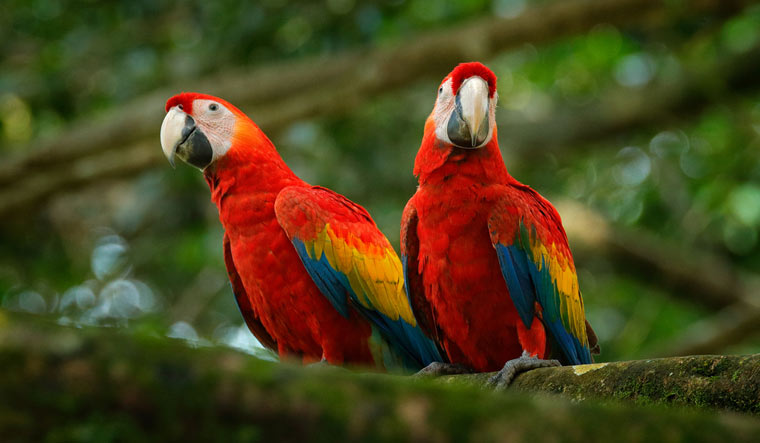

In [3]:
url = "https://img.theweek.in/content/dam/week/news/sci-tech/images/2022/4/5/macaw-bird.jpg"
image = Image.open(requests.get(url, stream=True).raw)

image

In [4]:
predictions = detector(image, candidate_labels=["fox", "parrots", "ducks", "owls"])
predictions

[{'score': 0.9999430179595947, 'label': 'parrots'},
 {'score': 4.957663259119727e-05, 'label': 'owls'},
 {'score': 6.711861715302803e-06, 'label': 'ducks'},
 {'score': 7.370605885625992e-07, 'label': 'fox'}]

In [5]:
highest_score = max(predictions, key=lambda x: x['score'])
most_likely_bird = highest_score['label']
most_likely_bird

'parrots'

Test 2

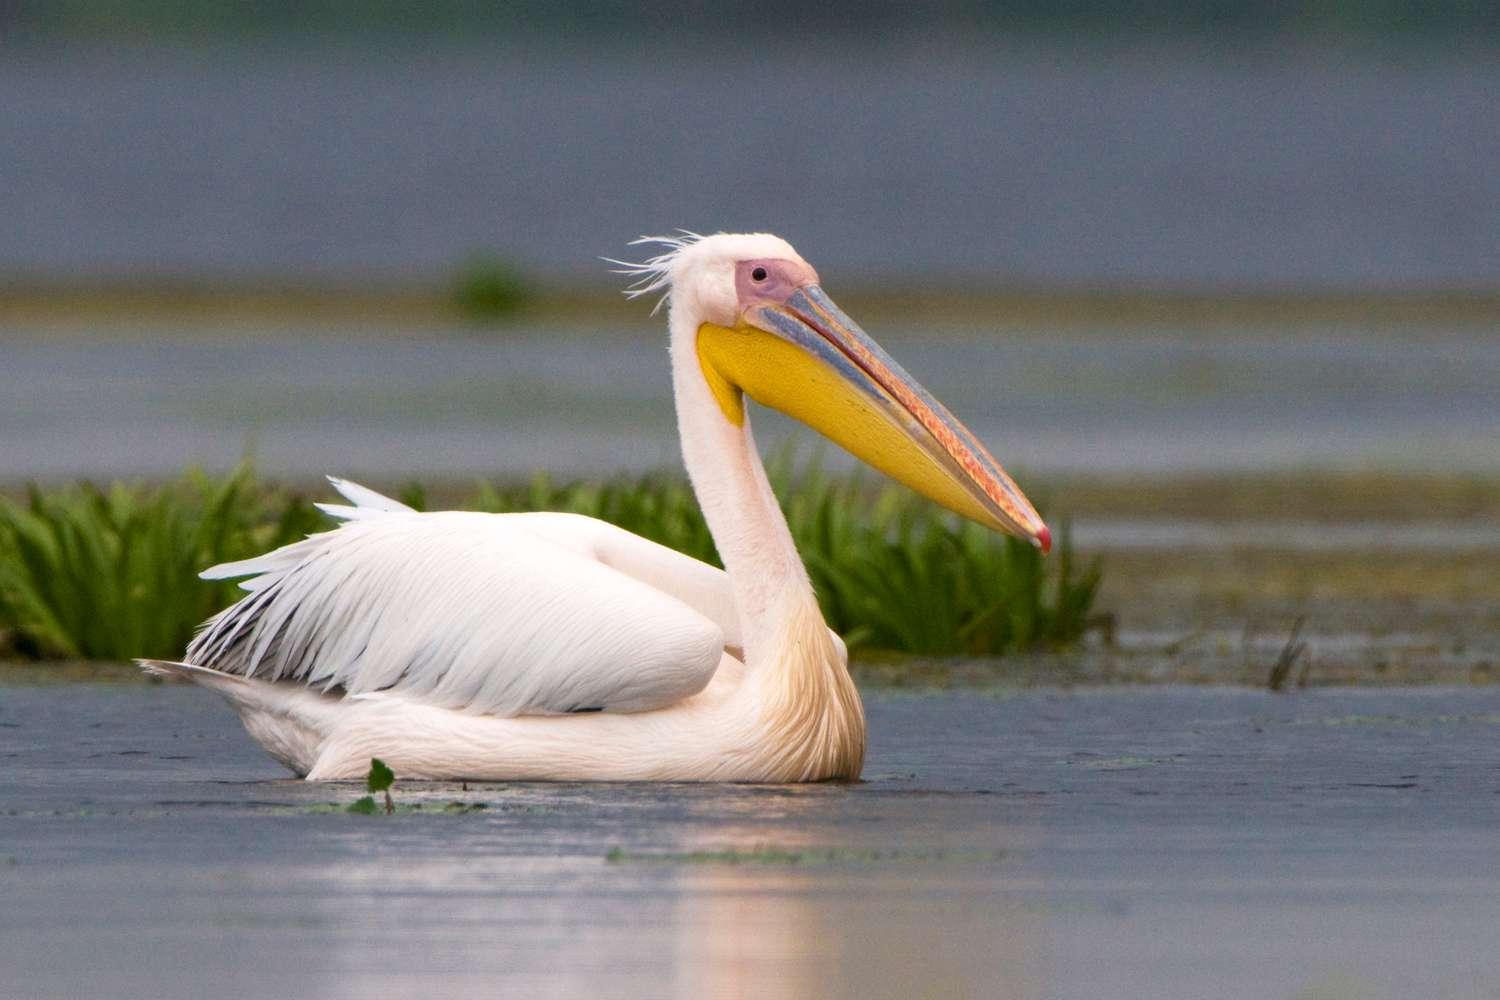

In [12]:
url = "https://www.thoughtco.com/thmb/IbQBWbNV5GiHoVb_MLpF7C59rrA=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/148094454-56a008725f9b58eba4ae8f43.jpg"
image = Image.open(requests.get(url, stream=True).raw)
image

In [13]:
predictions = detector(image, candidate_labels=["owl", "parrots", "duck", "pelican"])
highest_score = max(predictions, key=lambda x: x['score'])
most_likely_bird = highest_score['label']
most_likely_bird

'pelican'